In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))

import os
import ast
import torch
import pickle
import keyboard
import numpy as np
import pandas as pd
from utils.env_utils import *
from utils.eval_utils import *
from models.Buffer import Pool
from utils.train_utils import *
import matplotlib.pyplot as plt
from marl_aquarium import aquarium_v0

In [2]:
# Training
train_path = r"..\data\training"
training_folder = "Training - 31.07.2025_10.52 - tuned training" #"Training - 24.07.2025_18.52"   "Training - 28.07.2025_21.40"
pretrain_dir = os.path.join(train_path, training_folder, "pretraining")
train_dir = os.path.join(train_path, training_folder, "final_output")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

pretrain_pred_policy = torch.load(os.path.join(pretrain_dir, "pretrained_policy_predator.pt"), weights_only=False)
pretrain_prey_policy = torch.load(os.path.join(pretrain_dir, "pretrained_policy_prey.pt"), weights_only=False)

logs_pretrain_pred = torch.load(os.path.join(pretrain_dir, "pretrain_log_predator.pt"), weights_only=False)
logs_pretrain_prey = torch.load(os.path.join(pretrain_dir, "pretrain_log_prey.pt"), weights_only=False)

pred_policy = torch.load(os.path.join(train_dir, "pred_policy.pt"), weights_only=False)
prey_policy = torch.load(os.path.join(train_dir, "prey_policy.pt"), weights_only=False)

dis_metrics_pred = pd.read_csv(os.path.join(train_dir, "dis_metrics_pred.csv"))
dis_metrics_prey = pd.read_csv(os.path.join(train_dir, "dis_metrics_prey.csv"))

es_metrics_pred = pd.read_csv(os.path.join(train_dir, "es_metrics_pred.csv"))
es_metrics_prey = pd.read_csv(os.path.join(train_dir, "es_metrics_prey.csv"))

In [3]:
bc_path = rf"..\data\pretuning"
bc_folder = "Pretuning - 18.08.2025_16.52"

pretrain_pred_policy = torch.load(os.path.join(bc_path, bc_folder, "pred_policy.pt"), weights_only=False)
pretrain_prey_policy = torch.load(os.path.join(bc_path, bc_folder, "prey_policy.pt"), weights_only=False)

In [7]:
# Expert Data
total_detections=33
ftw_path = rf"..\data\processed\pred_prey_interactions\full_track_windows\{total_detections}"

start_frame_pool = Pool(max_length=12100, device=device)
start_frame_pool.generate_startframes(ftw_path)
print(f"Start frames in pool: {len(start_frame_pool)}")

Start frames in pool: 12006


In [8]:
env = parallel_env(predator_count=1, prey_count=32, action_count=360, use_walls=False)
positions = start_frame_pool.sample(n=1)
env.reset(options=positions)
metrics = run_policies(env, pred_policy, prey_policy)

Press 'q' to end simulation.


Pred Mean Polarization:  1.0
Prey Mean Polarization: 0.9999344

Pred Mean Angular Momentum:  0.29475766
Prey Mean Angular Momentum: 0.009259386

Pred Mean Pairwise Distance:  0.5235998
Prey Mean Pairwise Distance: 0.46324396


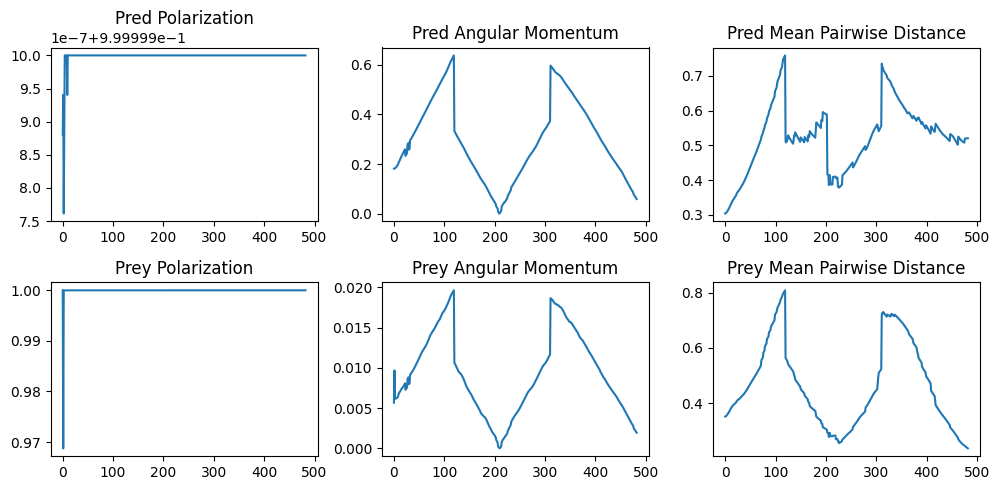

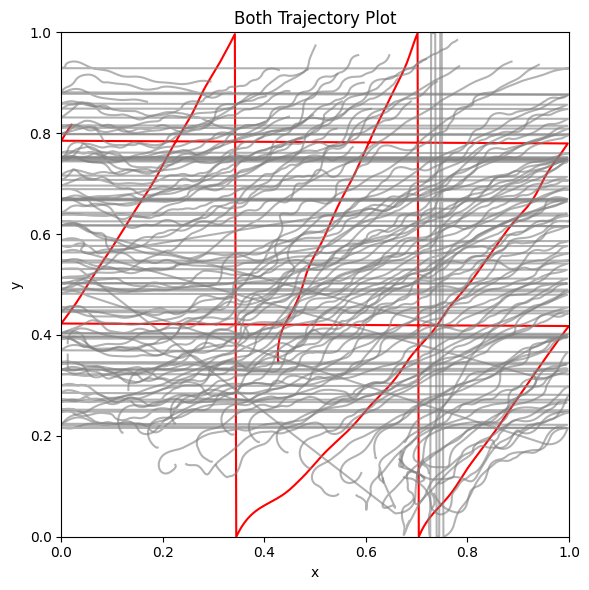

In [18]:
print("Pred Mean Polarization: ", np.mean([m["polarization"][0] for m in metrics]))
print("Prey Mean Polarization:", np.mean([m["polarization"][1] for m in metrics]))

print("\nPred Mean Angular Momentum: ", np.mean([m["angular_momentum"][0] for m in metrics]))
print("Prey Mean Angular Momentum:", np.mean([m["angular_momentum"][1] for m in metrics]))

print("\nPred Mean Pairwise Distance: ", np.mean([m["mean_pairwise_distance"][0] for m in metrics]))
print("Prey Mean Pairwise Distance:", np.mean([m["mean_pairwise_distance"][1] for m in metrics]))

plot_metrics(metrics)

plot_trajectory(metrics, role='both')

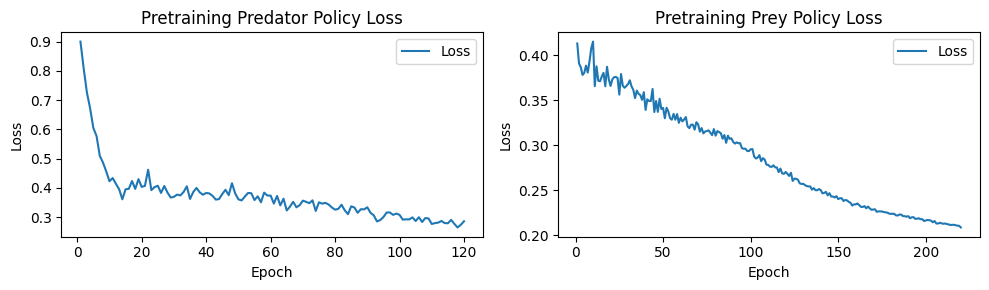

In [13]:
plot_pretraining(logs_pretrain_pred, logs_pretrain_prey)

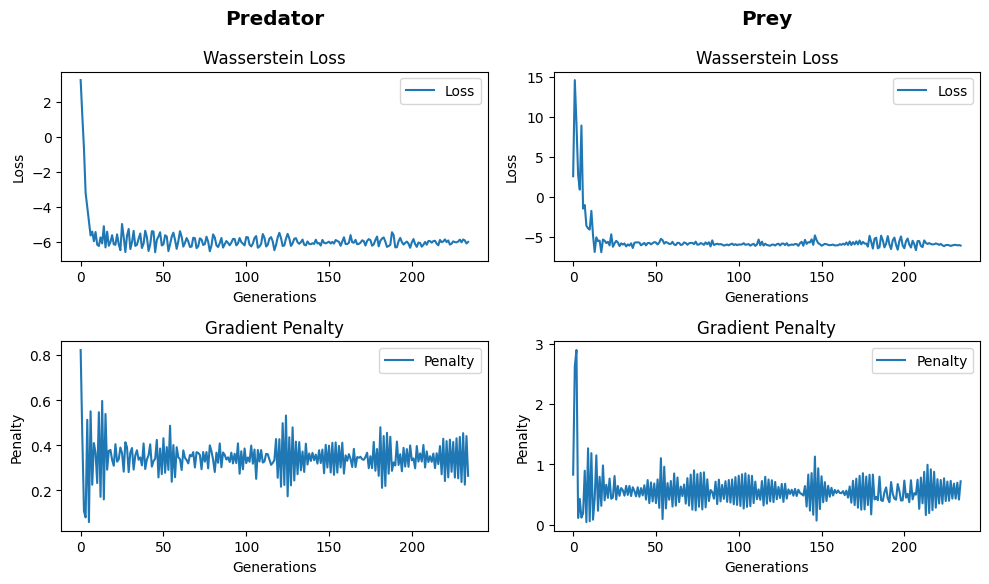

In [14]:
evaluate_discriminator(dis_metrics_pred, dis_metrics_prey)

In [ ]:
plot_scores(dis_metrics_pred, dis_metrics_prey)

In [ ]:
evaluate_es(es_metrics_pred, es_metrics_prey)

In [ ]:
plot_grad_norm(es_metrics_pred, es_metrics_prey)